## Метрики

### **Среднее квадратическое отклонение или MSE (Mean Squared Error):**

$$ MSE = \frac{1}{N} \sum_{i=1}^{N} (a(x_i) - y_i) ^ 2 $$

$l$ - число объектов в выборке

Рассмотрим пример рассчета метрик, где модель предсказала 4 разных значения, а правильный ответ был всегда 10.


$$  MSE = \frac{1}{4} ((11 - 10)^ 2+ (9 - 10)^ 2 + (20 - 10)^ 2 + (1 - 10)^ 2)$$

$$ MSE = \frac{1}{4} (1 + 1 + 100 + 81) = 45.75 $$

### **Среднее абсолютное отклонение или MAE (Mean Absolute Error):**

$$ MAE = \frac{1}{l} \sum_{i=1}^{l} |a(x_i) - y_i| $$

$l$ - число объектов в выборке

$$ MAE = \frac{1}{4} (1 + 1 + 10 + 9) = 5.25 $$

### **Среднее абсолютное процентное отклонение или MAPE (Mean Absolute Percentage Error):**

Мы измеряли качество модели с помощью наиболее простой метрики Mean absolute error (MAE). Она измеряется в тех же единицах, что и целевая переменная, в нашем случае это число велосипедов. Но часто хочется иметь метрику в процентах. И, конечно, метрику легко модифицировать так, чтобы она принимала значения в процентах - получится Mean absolute percentage error (MAPE):

$$MAPE = \frac 1 N \sum_{n=1}^N \frac {|y_n-a(x_n)|}{|y_n|}$$

В данной формуле выполняется суммирование по объектам выборки, далее ошибка предсказания $|y_n-a(x_n)|$ на каждом объекте делится на модуль целевой переменной $|y_n|$. Получается, мы смотрим, на какой процент от той, величины, что мы хотим предсказать, модель в среднем ошибается. Вместо среднего можно использовать медиану для большей устойчивости к выбросам.

Однако, если у нас один из исходных $y_i$ будет равен 0, то метрика по такому наблюдению не посчитается. Так как мы не поделим на ноль.

$$ MAPE = \frac{1}{4} (0.1 + 0.1 + 1 + 0.9) = 0.525 $$

### **R² (коэффициент детерминации):**

Коэффициент детерминации в линейной регрессии измеряет долю дисперсии (разброс значений) зависимой переменной, которую модель может объяснить. Он принимает значения от 0 до 1, где 1 указывает на идеальное соответствие модели данным. Хотя если предсказание модели очень плохое, $R^2$ может принимать значения до $-∞$.

Формула для R² выглядит следующим образом:

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \overline{y_i})^2}$$

Таким образом, R² измеряет, насколько хорошо модель соответствует данным, и чем ближе к 1, тем лучше моделью объясняется изменчивость зависимой переменной.

## Линейная регрессия

**Линейная модель** суммирует значения всех признаков с некоторыми весами.

**Веса $w_i$ при признаках** - параметры, которые необходимо настраивать в процессе обучения

$$
a(x) = w_0 + w_1 \cdot x_1 + ... + w_d \cdot x_d
$$

где $d$ - число признаков.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

### Гипер параметры
#random_state = 0 # 0.79
random_state = 42 # 0.92
test_size = 0.3

# загружаем таблицу формата xlsx
data = pd.read_excel(io = "https://github.com/groxel/colab/raw/refs/heads/main/data_set_cleared.xlsx", header = 3)

# выводим первые пять строчек
#print('data.head(): ', data.head())
# число строк, число столбцов
#print('data.shape: ', data.shape)
#print('data.info(): ', data.info())
#print('X.describe().T: ', X.describe().T)

X = data.drop(columns=['Наименование компании', 'ИНН', 'Полученные деньги (авансы), тыс. руб.', 'Остаток к получению, тыс. руб.'])
X = X.drop(columns=['Количество контрагентов', 'Количество контрактов'])
#X = X.drop(columns=['Сумма договоров, тыс. руб.'])
Y = data["Остаток к получению, тыс. руб."]

# реализуем разделение на train и test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

#print('X_train.shape: ', X_train.shape)
#print('X_test.shape: ', X_test.shape)

model = LinearRegression() # определяем модель
model.fit(X_train, Y_train) # обучаем модель на обучающей выборке

#print('model.coef_:', model.coef_)
#print('model.intercept_:', model.intercept_)

# предсказываем значения целевой переменной для обучающей выборки
preds_train = model.predict(X_train)

# предсказываем значение целевой переменной для тестовой выборки
preds_test = model.predict(X_test)

#print('preds_test[:10]: ', preds_test[:10]) # выведем значения с первого по десятое
# выводим первые десять значений целевой переменной тестовой выборки
#print('Y_test[:10].values: ', Y_test[:10].values)

print('MSE train: ', mean_squared_error(Y_train, preds_train))
print('MSE test:  ', mean_squared_error(Y_test, preds_test))
print('RMSE train: ', np.sqrt(mean_squared_error(Y_train, preds_train)))
print('RMSE test:  ', np.sqrt(mean_squared_error(Y_test, preds_test)))
print('MAE train: ', mean_absolute_error(Y_train, preds_train))
print('MAE test:  ', mean_absolute_error(Y_test, preds_test))
print('R^2 train: ', r2_score(Y_train, preds_train))
print('R^2 test:  ', r2_score(Y_test, preds_test))

weights_data = {
    "веса":model.coef_,
    "признаки": X.columns
}

# задаем с помощью словаря веса и признаки модели
weights = pd.DataFrame(weights_data) # преобразовываем признаки с весами в таблицу
weights.sort_values("веса") # сортируем полученную таблицу

MSE train:  2474603975610.4614
MSE test:   77462889819745.67
RMSE train:  1573087.4024066373
RMSE test:   8801300.461849127
MAE train:  1118761.424374845
MAE test:   4985362.726384911
R^2 train:  0.9972452133165306
R^2 test:   0.9224739022400422


,веса,признаки
15,-9.772141,Прибыль до налогооблажения
2,-7.157046,Фин вложения (1170)
8,-3.065264,Заемные средства (1410)
4,-2.172247,Дебиторская задолженность
10,-1.744784,Кредиторская задолженность
12,-1.375933,Выручка
1,-1.362126,Основные средства
3,-1.281019,Запасы
7,-0.672224,Раздел 3
5,-0.327928,Фин вложения (1240)


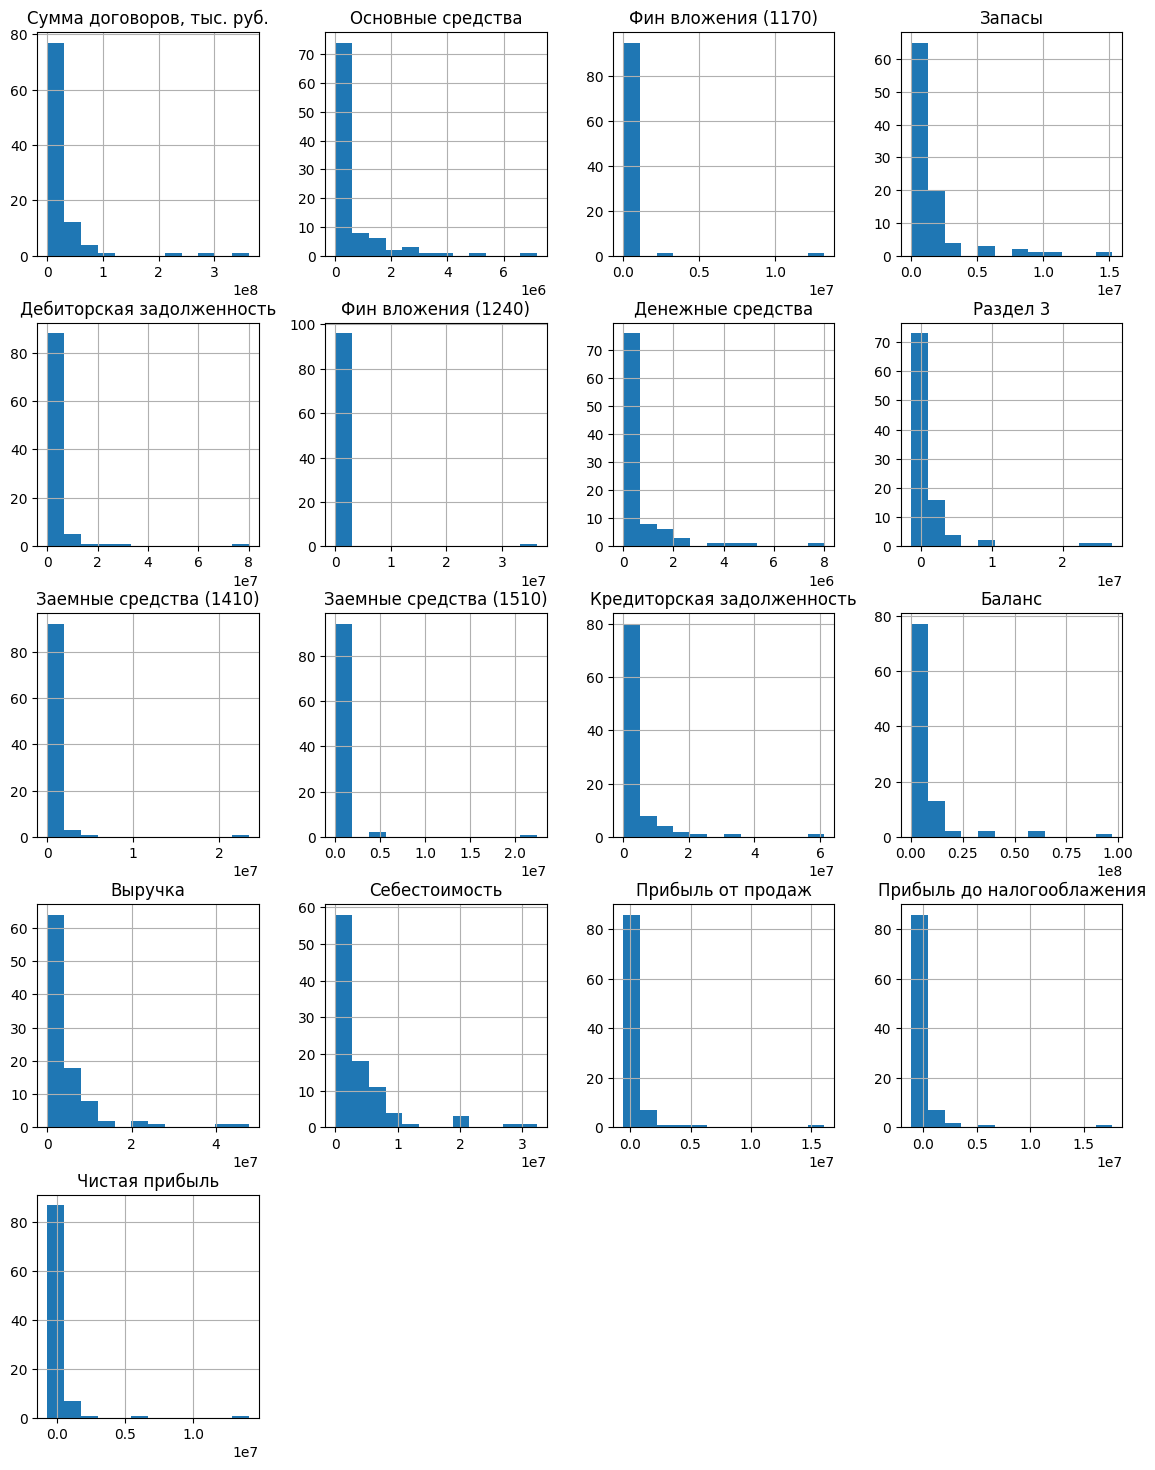

In [ ]:
X.hist(figsize=(14, 18), bins=12);

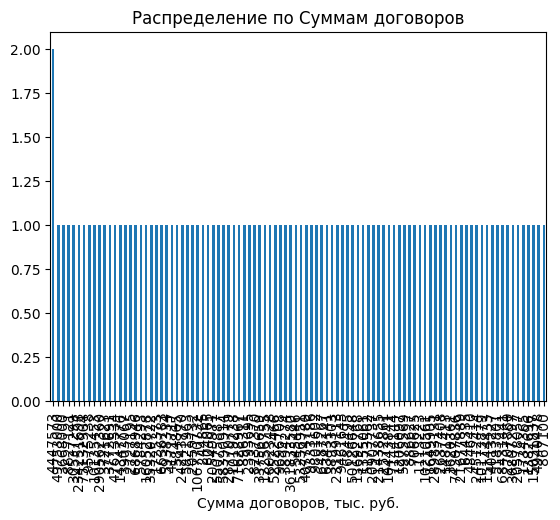

In [ ]:
import matplotlib.pyplot as plt

data['Сумма договоров, тыс. руб.'].value_counts().plot(kind='bar', )
plt.title('Распределение по Суммам договоров');

In [ ]:
import statsmodels.api as sm

# включить в модель свободный член
X_train_with_const = sm.add_constant(X_train)

# Обучение модели линейной регрессии с использованием statsmodels
lin_reg_sm = sm.OLS(Y_train, X_train_with_const).fit()

# Вывод статистического отчета
print(lin_reg_sm.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Остаток к получению, тыс. руб.   R-squared:                       0.997
Model:                                        OLS   Adj. R-squared:                  0.996
Method:                             Least Squares   F-statistic:                     1043.
Date:                            Mon, 02 Jun 2025   Prob (F-statistic):           1.14e-56
Time:                                    17:12:56   Log-Likelihood:                -1051.1
No. Observations:                              67   AIC:                             2138.
Df Residuals:                                  49   BIC:                             2178.
Df Model:                                      17                                         
Covariance Type:                        nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.

## Градиентный спуск

Градиентный спуск — это алгоритм оптимизации, который используется для нахождения минимума функции. Основная идея заключается в следующем: чтобы минимизировать функцию, мы будем двигаться в направлении, противоположном градиенту этой функции. Градиент показывает направление наибольшего возрастания функции, поэтому движение в противоположном направлении будет приводить к её уменьшению.

На каждом шаге алгоритм обновляет параметры модели в направлении, противоположном градиенту функции потерь, с умножением на заданный коэффициент обучения. Это продолжается до тех пор, пока изменение функции потерь не станет достаточно малым или не будет достигнуто максимальное количество итераций.

Одним из самых важных гиперпараметров градиентного спуска является `learning rate` (скорость обучения). Подбор оптимального learning rate в методе градиентного спуска критически важен. Learning rate определяет шаг, на который модель будет обновлять свои параметры на каждой итерации. Если learning rate слишком мал, сходимость может быть слишком медленной, требуя большого количества итераций. Если же learning rate слишком велик, модель может не сойтись к оптимальному решению и расходиться.

Оптимально подобранный learning rate позволяет градиентному спуску быстро сойтись к оптимальному решению, ускоряя обучение модели, и при этом обеспечивает устойчивость процесса обновления параметров.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

### Гипер параметры
#random_state = 0
random_state = 42
test_size = 0.3
learning_rate = 0.1
n_iterations = 10000 # 0.94
#n_iterations = 100000 # 0.93

# загружаем таблицу формата xlsx
data = pd.read_excel(io = "https://github.com/groxel/colab/raw/refs/heads/main/data_set_cleared.xlsx", header = 3)

X = data.drop(columns=['Наименование компании', 'ИНН', 'Полученные деньги (авансы), тыс. руб.', 'Остаток к получению, тыс. руб.'])
X = X.drop(columns=['Количество контрагентов', 'Количество контрактов'])
#X = X.drop(columns=['Сумма договоров, тыс. руб.'])
Y = data["Остаток к получению, тыс. руб."]

# реализуем разделение на train и test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Добавим столбец для свободного члена в начало
X_train_scaled = np.hstack([
    np.ones((X_train_scaled.shape[0], 1)), X_train_scaled
])

X_test_scaled = np.hstack([
    np.ones((X_test_scaled.shape[0], 1)), X_test_scaled
])

# Зададим гиперпараметры
m = X_train_scaled.shape[0] # количество объектов
n = X_train_scaled.shape[1] # количество признаков

# Случайно инициализируем веса
np.random.seed(42)
weights = np.random.randn(n)

# Запустим алгоритм градиентного спуска
for iteration in range(n_iterations):
    predictions = X_train_scaled.dot(weights) # предсказания
    errors = predictions - Y_train # ошибка

    # вычисляем направление спуска (grad_f(x))
    gradients = 1/m * X_train_scaled.T.dot(errors)
    weights -= learning_rate * gradients # обновляем значение в точке

# Получим предсказания
Y_pred = X_test_scaled.dot(weights)

print('MSE test:  ', mean_squared_error(Y_test, Y_pred))
print('RMSE test:  ', np.sqrt(mean_squared_error(Y_test, Y_pred)))
print('MAE test:  ', mean_absolute_error(Y_test, Y_pred))
print('R^2 test:  ', r2_score(Y_test, Y_pred))

MSE test:   52656172611542.65
RMSE test:   7256457.304466323
MAE test:   3820684.711636682
R^2 test:   0.9473008611601386


## Метод Lasso

Чтобы бороться с возможным переобучением линейных моделей можно использовать модели с ***регуляризацией***. Ключевой признак переобучения линейной модели - большие веса при нормализированных признаках. Давайте будем штрафовать модели за большие веса.

В линейных моделях есть специальные модификации для борьбы с переобучением, называемые *Ridge* и *Lasso*.

Модель **Lasso** прибавляет к нашей функции ошибок штраф, основанный на сумме абсолютных значений коэффициентов модели.

$$Lasso Loss = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y_i})^2 + \alpha\sum_{j=1}^{m}|w_j|$$

В свою очередь, модель **Ridge** использует штраф, основанный на сумме квадратов весов.


$$Ridge Loss = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y_i})^2 + \alpha\sum_{j=1}^{m}w_j^2$$

Величина штрафа регулируется через коэффициент **$\alpha$**.

**Lasso** и **Ridge** во время обучения требуют, чтобы не только ошибка на обучающих данных была как можно ниже, но и чтобы веса были как можно более близки к нулю и чтобы часть из них приняла нулевые значения. А если какой-то признак умножается на нулевой вес, это равносильно удалению этого признака. Давайте применим этот механизм к нашим данным и посмотрим, какие признаки отберет модель.

Импортируем модель `Lasso`, выполним обучение, предсказание и оценку ошибки:

Перед использованием `Lasso` регрессии необходимо стандартизировать признаки, чтобы все они были в одинаковых единицах измерения. Для этого будем использовать `StandardScaler` из sklearn!

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

### Гипер параметры
#random_state = 0
random_state = 42
test_size = 0.3
#alpha = 10000 # 0.94
alpha = 100000 # 0.9596

# загружаем таблицу формата xlsx
data = pd.read_excel(io = "https://github.com/groxel/colab/raw/refs/heads/main/data_set_cleared.xlsx", header = 3)

X = data.drop(columns=['Наименование компании', 'ИНН', 'Полученные деньги (авансы), тыс. руб.', 'Остаток к получению, тыс. руб.'])
X = X.drop(columns=['Количество контрагентов', 'Количество контрактов'])
#X = X.drop(columns=['Сумма договоров, тыс. руб.'])
Y = data["Остаток к получению, тыс. руб."]

# реализуем разделение на train и test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Lasso(alpha=alpha) #определяем модель
model.fit(X_train_scaled, Y_train) #обучаем модель
preds_train = model.predict(X_train_scaled) #делаем предсказание для обучающих данных
preds_test = model.predict(X_test_scaled) #делаем предсказание для тестовых данных

print('MSE train: ', mean_squared_error(Y_train, preds_train))
print('MSE test:  ', mean_squared_error(Y_test, preds_test))
print('RMSE train: ', np.sqrt(mean_squared_error(Y_train, preds_train)))
print('RMSE test:  ', np.sqrt(mean_squared_error(Y_test, preds_test)))
print('MAE train: ', mean_absolute_error(Y_train, preds_train))
print('MAE test:  ', mean_absolute_error(Y_test, preds_test))
print('R^2 train: ', r2_score(Y_train, preds_train))
print('R^2 test:  ', r2_score(Y_test, preds_test))

print("Число активных признаков:", sum(model.coef_!=0), \
      "/", model.coef_.shape[0])

weights_data = {"веса":model.coef_,\
                "признаки": X_train.columns}
weights = pd.DataFrame(weights_data)
#print(weights.sort_values("веса"))
print(weights)

weights_lasso = weights;


MSE train:  4949846342911.24
MSE test:   40330267987403.07
RMSE train:  2224825.013998009
RMSE test:   6350611.623096083
MAE train:  1454678.8669051905
MAE test:   3667011.774711368
R^2 train:  0.994489715960588
R^2 test:   0.9596368234395548
Число активных признаков: 10 / 17
            веса                    признаки
0   3.127928e+07  Сумма договоров, тыс. руб.
1   9.053246e+05           Основные средства
2  -0.000000e+00         Фин вложения (1170)
3   1.540979e+06                      Запасы
4  -2.604799e+06   Дебиторская задолженность
5   0.000000e+00         Фин вложения (1240)
6   1.507614e+06           Денежные средства
7   2.225688e+06                    Раздел 3
8  -0.000000e+00     Заемные средства (1410)
9   2.839218e+06     Заемные средства (1510)
10 -3.952100e+06  Кредиторская задолженность
11 -0.000000e+00                      Баланс
12 -4.102723e+06                     Выручка
13 -0.000000e+00               Себестоимость
14 -0.000000e+00           Прибыль от продаж
15 

<Axes: >

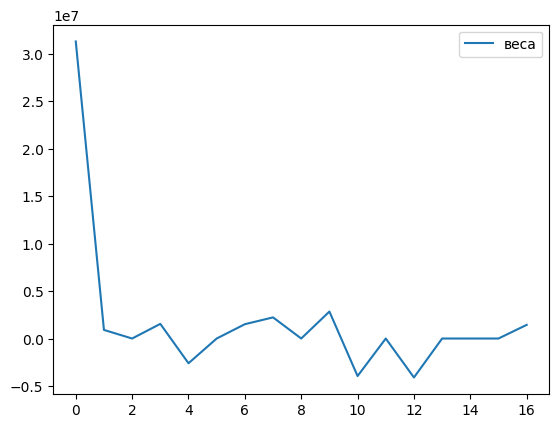

In [7]:
weights.plot()

## Метод Ridge

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

### Гипер параметры
#random_state = 0
#random_state = 42
random_state = 23643
test_size = 0.3
alpha = 0.25 # 0.9668 / 0.9486

# загружаем таблицу формата xlsx
data = pd.read_excel(io = "https://github.com/groxel/colab/raw/refs/heads/main/data_set_cleared.xlsx", header = 3)

X = data.drop(columns=['Наименование компании', 'ИНН', 'Полученные деньги (авансы), тыс. руб.', 'Остаток к получению, тыс. руб.'])
X = X.drop(columns=['Количество контрагентов', 'Количество контрактов'])
#X = X.drop(columns=['Сумма договоров, тыс. руб.'])
Y = data["Остаток к получению, тыс. руб."]

# реализуем разделение на train и test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Ridge(alpha=alpha) #определяем модель
model.fit(X_train_scaled, Y_train) #обучаем модель
preds_train = model.predict(X_train_scaled) #делаем предсказание для обучающих данных
preds_test = model.predict(X_test_scaled) #делаем предсказание для тестовых данных

print("Ошибка на обучении:", mean_absolute_error(Y_train, preds_train)) #находим значение МАЕ для обучающей выборки
print("Ошибка на тесте:", mean_absolute_error(Y_test, preds_test))#находим значение МАЕ для тестовой выборки
print('R^2 train:  ', r2_score(Y_train, preds_train))
print('R^2 test:  ', r2_score(Y_test, preds_test))
print("Число активных признаков:", sum(model.coef_!=0), \
      "/", model.coef_.shape[0])

weights_data = {"веса":model.coef_,\
                "признаки": X_train.columns}
weights = pd.DataFrame(weights_data)
#print(weights.sort_values("веса"))
print(weights)

weights_ridge = weights

Ошибка на обучении: 1607446.647154598
Ошибка на тесте: 2494932.849654035
R^2 train:   0.9942902607232978
R^2 test:   0.9668983731169606
Число активных признаков: 17 / 17
            веса                    признаки
0   3.432267e+07  Сумма договоров, тыс. руб.
1   5.766011e+05           Основные средства
2  -5.216016e+06         Фин вложения (1170)
3   1.814370e+06                      Запасы
4  -2.593590e+06   Дебиторская задолженность
5  -3.556700e+06         Фин вложения (1240)
6   7.297069e+05           Денежные средства
7   2.793375e+06                    Раздел 3
8   1.074485e+06     Заемные средства (1410)
9   1.209636e+07     Заемные средства (1510)
10 -3.373684e+06  Кредиторская задолженность
11 -3.963449e+06                      Баланс
12 -2.421478e+06                     Выручка
13 -2.029884e+06               Себестоимость
14 -1.313853e+06           Прибыль от продаж
15 -2.361793e+06  Прибыль до налогооблажения
16  4.309629e+06              Чистая прибыль


<Axes: >

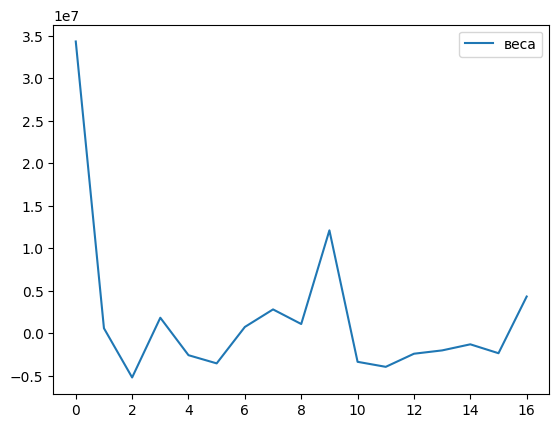

In [9]:
weights.plot()

Text(0, 0.5, 'Вес')

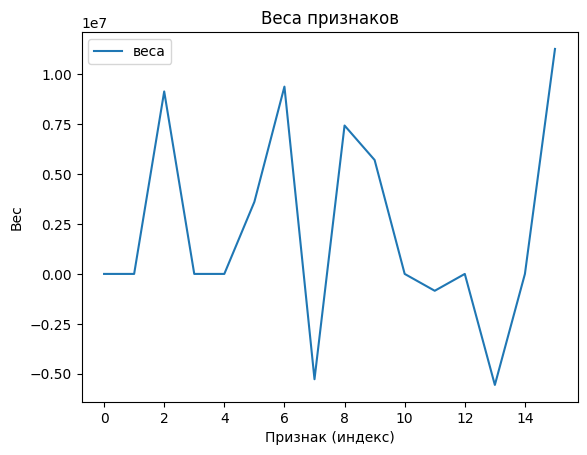

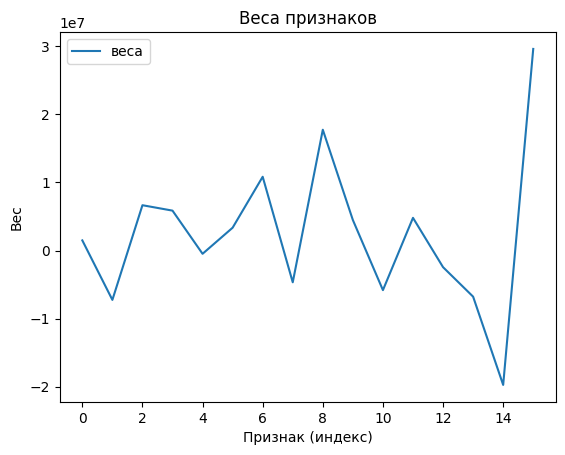

In [20]:
weights_lasso.plot()
plt.title("Веса признаков")
plt.xlabel('Признак (индекс)')
plt.ylabel('Вес')

weights_ridge.plot()
plt.title("Веса признаков")
plt.xlabel('Признак (индекс)')
plt.ylabel('Вес')


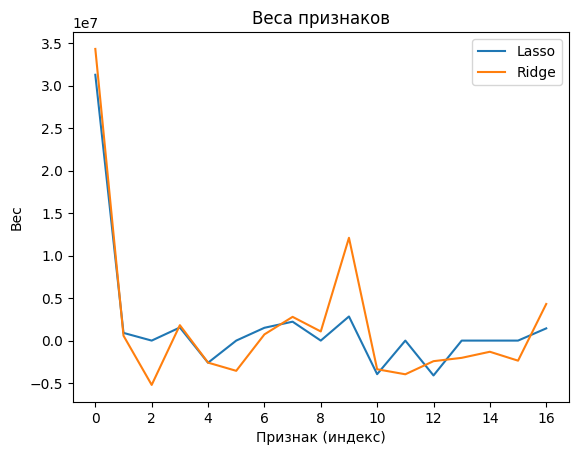

In [32]:
plt.plot('веса', label='Lasso', data=weights_lasso)
plt.plot('веса', label='Ridge', data=weights_ridge)
plt.title("Веса признаков")
plt.xlabel('Признак (индекс)')
plt.ylabel('Вес')
plt.legend()
plt.show()

In [1]:
from matplotlib import pyplot as plt

#plt.plot(range(1, len(train_history)+1), train_history, label='Train Accuracy', marker="o")
#plt.plot(range(1, len(test_history)+1), test_history, label='Test Accuracy', marker="o")

plt.plot(range(1, len(test_history)+1), test_history, label='Test Accuracy', marker="o")

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Зависимость accuracy на train и test для каждой эпохи")
plt.legend()
plt.show()

NameError: name 'train_history' is not defined